# Analysis of House and Senate Party Twitter Account Retweets

This notebook contains the data manipulation and visualization for this project. Much of it is down and dirty and could be streamlined in the future.

Note, in variable names: <br>
D_House = House Dems <br>
R_House = House GOP <br>
D_Senate = Senate Dems <br>
R_Senate = Senate GOP <br>

In [1]:
#Not all of these imports are actually used in the current iteration of this notebook but may be used in the future
import tweepy as tw
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
import collections
import threading
from datetime import datetime
from cf import * #This file contains the custom functions used here to process Tweepy data
from RepeatedTimer import *
import operator

## Authorization and Setup

For this project I only need read access to already public data so OAuth2 is what I'll use to hook up with the Twitter API. Then create an API instance and instances for the accounts I'm interested in and I can start scraping data. There is a better way of entering credentials by storing them in separate txt file and reading them in but this works too.

In [2]:
#Enter your own Twitter API credentials here
auth = tw.AppAuthHandler("ENTER YOURS", "ENTER YOURS")
api = tw.API(auth, wait_on_rate_limit=True)

#Define some variables containing the Twitter handles of accounts I'm interested in
D_House = 'HouseDemocrats'
R_House = 'HouseGOP'

D_Senate = 'SenateDems'
R_Senate = 'SenateGOP'

In [3]:
#Get the retweet data
D_House_names,D_House_period = get_retweets_screennames(D_House, 30, api)
R_House_names,R_House_period = get_retweets_screennames(R_House, 30, api)
D_Senate_names,D_Senate_period = get_retweets_screennames(D_Senate, 30, api)
R_Senate_names,R_Senate_period = get_retweets_screennames(R_Senate, 30, api)

In [4]:
#Get some additional user info of the retweetees
D_House_bios = []

for name in D_House_names:
    D_House_bios.append(get_user_info(name, api))
    
R_House_bios = []

for name in R_House_names:
    R_House_bios.append(get_user_info(name, api))

D_Senate_bios = []

for name in D_Senate_names:
    D_Senate_bios.append(get_user_info(name, api))
    
R_Senate_bios = []

for name in R_Senate_names:
    R_Senate_bios.append(get_user_info(name, api))

In [5]:
#Utility function that returns the sum of the items in a list
def sum_list(ls):
    tot = 0
    for i in range(0, len(ls)):
        tot += ls[i]
    return tot

#Utility function that converts list of tupled labels and frequencies to labels and percentages
def freq_to_per(input_list_tuples):
    
    input_labels, input_freqs = zip(*input_list_tuples)
    
    tot = sum_list(input_freqs)
    
    output_pers  = []
    for j in range(0, len(input_freqs)):
        output_pers.append(round(100*(input_freqs[j]/tot),1))
    
    return list(zip(input_labels, output_pers))

## Retweets by State

In the cells below I am looking plot how many retweets of senators and representatives come from a given state, this is the part of the notebook where a good amount of massaging is needed to get the data in the proper format. For the following sections I will only comment the 1/4 of the code because the rest is just doing the same for the 3 other accounts I'm pulling data from.

In [6]:
#List of the states for each retweet
D_House_state_list = []

#List of any members of Congress retweeted
D_House_MC_list = []

for bio in D_House_bios:
    if(bio[0]=="Rep" or bio[0]=="Sen"): 
        D_House_state_list.append(bio[4])
        D_House_MC_list.append(bio)
        
#List of tuples of state name and count of retweets
D_House_state_freq = freq(D_House_state_list)

#Sorting from most instances to least
D_House_state_freq.sort(key=operator.itemgetter(1), reverse=True)

#Convert count to percentage
D_House_state_per = freq_to_per(D_House_state_freq)


R_House_state_list = []
R_House_MC_list = []

for bio in R_House_bios:
    if(bio[0]=="Rep" or bio[0]=="Sen"): 
        R_House_state_list.append(bio[4])
        R_House_MC_list.append(bio)

R_House_state_freq = freq(R_House_state_list)
R_House_state_freq.sort(key=operator.itemgetter(1), reverse=True)
R_House_state_per = freq_to_per(R_House_state_freq)


D_Senate_state_list = []
D_Senate_MC_list = []

for bio in D_Senate_bios:
    if(bio[0]=="Rep" or bio[0]=="Sen"): 
        D_Senate_state_list.append(bio[4])
        D_Senate_MC_list.append(bio)

D_Senate_state_freq = freq(D_Senate_state_list)
D_Senate_state_freq.sort(key=operator.itemgetter(1), reverse=True)
D_Senate_state_per = freq_to_per(D_Senate_state_freq)


R_Senate_state_list = []
R_Senate_MC_list = []

for bio in R_Senate_bios:
    if(bio[0]=="Rep" or bio[0]=="Sen"): 
        R_Senate_state_list.append(bio[4])
        R_Senate_MC_list.append(bio)

R_Senate_state_freq = freq(R_Senate_state_list)
R_Senate_state_freq.sort(key=operator.itemgetter(1), reverse=True)
R_Senate_state_per = freq_to_per(R_Senate_state_freq)


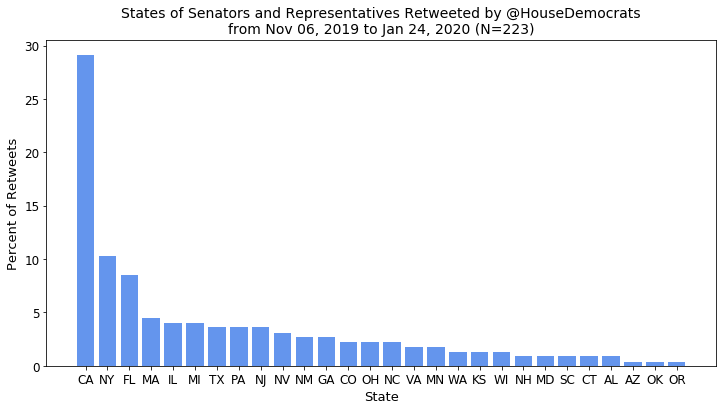

In [7]:
#Unzip the tuple list into two lists
D_House_l, D_House_fv = zip(*D_House_state_freq)

#Get sample size
D_House_n = sum(D_House_fv)

#Unzip the tuple list into two lists
D_House_labels, D_House_vals = zip(*D_House_state_per)

#Plot it
plt.figure(figsize=[12,6])
plt.bar(D_House_labels, D_House_vals, color='cornflowerblue')
D_House_title = "States of Senators and Representatives Retweeted by @HouseDemocrats\nfrom "+ D_House_period[0].strftime("%b %d, %Y") + " to " + D_House_period[1].strftime("%b %d, %Y") + " (N=" + str(D_House_n) + ")"
plt.title(D_House_title, fontsize=14)
plt.xlabel("State", fontsize=13)
plt.ylabel("Percent of Retweets", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Plots/D_House_Geo_RT.png')
plt.show()

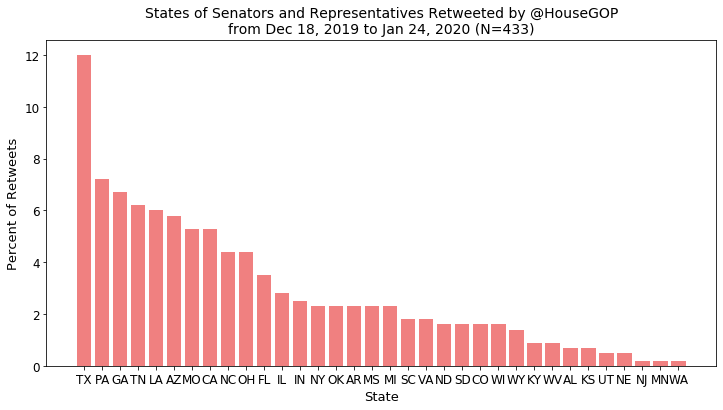

In [8]:
R_House_l, R_House_fv = zip(*R_House_state_freq)
R_House_n = sum(R_House_fv)

R_House_labels, R_House_vals = zip(*R_House_state_per)

plt.figure(figsize=[12,6])
plt.bar(R_House_labels, R_House_vals, color='lightcoral')
R_House_title = "States of Senators and Representatives Retweeted by @HouseGOP\nfrom "+ R_House_period[0].strftime("%b %d, %Y") + " to " + R_House_period[1].strftime("%b %d, %Y") + " (N=" + str(R_House_n) + ")"
plt.title(R_House_title, fontsize=14)
plt.xlabel("State", fontsize=13)
plt.ylabel("Percent of Retweets", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Plots/R_House_Geo_RT.png')
plt.show()

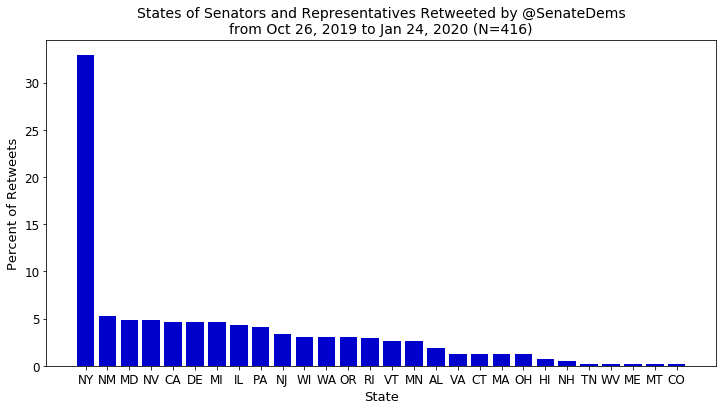

In [9]:
D_Senate_l, D_Senate_fv = zip(*D_Senate_state_freq)
D_Senate_n = sum(D_Senate_fv)

D_Senate_labels, D_Senate_vals = zip(*D_Senate_state_per)

plt.figure(figsize=[12,6])
plt.bar(D_Senate_labels, D_Senate_vals, color='mediumblue')
D_Senate_title = "States of Senators and Representatives Retweeted by @SenateDems\nfrom "+ D_Senate_period[0].strftime("%b %d, %Y") + " to " + D_Senate_period[1].strftime("%b %d, %Y") + " (N=" + str(D_Senate_n) + ")"
plt.title(D_Senate_title, fontsize=14)
plt.xlabel("State", fontsize=13)
plt.ylabel("Percent of Retweets", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Plots/D_Senate_Geo_RT.png')
plt.show()

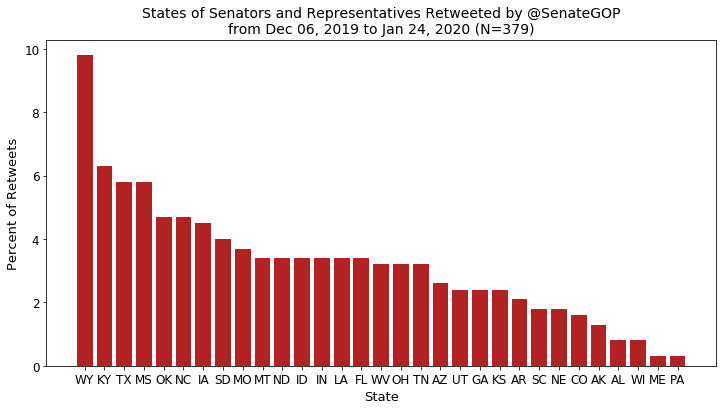

In [10]:
R_Senate_l, R_Senate_fv = zip(*R_Senate_state_freq)
R_Senate_n = sum(R_Senate_fv)

R_Senate_labels, R_Senate_vals = zip(*R_Senate_state_per)

plt.figure(figsize=[12,6])
plt.bar(R_Senate_labels, R_Senate_vals, color='firebrick')
R_Senate_title = "States of Senators and Representatives Retweeted by @SenateGOP\nfrom "+ R_Senate_period[0].strftime("%b %d, %Y") + " to " + R_Senate_period[1].strftime("%b %d, %Y") + " (N=" + str(R_Senate_n) + ")"
plt.title(R_Senate_title, fontsize=14)
plt.xlabel("State", fontsize=13)
plt.ylabel("Percent of Retweets", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Plots/R_Senate_Geo_RT.png')
plt.show()

## Categorizing Retweets

Next I try to categorize the users retweeted. This is a pretty monumental task considering the amount of possibilities. The most common ones are obvious but the outliers are a pain to come up with. See the CSVs in this directory for more info on what accounts are included. For now the categories are:<br>
* Representatives
* Senators
* Executive Branch (think POTUS and VP)
* Committees
* Caucuses (incomplete but major ones are included)
* Media/Journalists (incomplete)
* Other (everything else)


In [11]:
#List of category for each retweet
D_House_cats = []

for user in D_House_bios:
    D_House_cats.append(user[0])

#Get the count for each category
D_House_cats_freq = freq(D_House_cats)
D_House_cats_freq.sort(key=operator.itemgetter(1), reverse=True)

#Convert to a percentage
D_House_cats_per = freq_to_per(D_House_cats_freq)


R_House_cats = []

for user in R_House_bios:
    R_House_cats.append(user[0])
    
R_House_cats_freq = freq(R_House_cats)
R_House_cats_freq.sort(key=operator.itemgetter(1), reverse=True)
R_House_cats_per = freq_to_per(R_House_cats_freq)


D_Senate_cats = []

for user in D_Senate_bios:
    D_Senate_cats.append(user[0])
    
D_Senate_cats_freq = freq(D_Senate_cats)
D_Senate_cats_freq.sort(key=operator.itemgetter(1), reverse=True)
D_Senate_cats_per = freq_to_per(D_Senate_cats_freq)


R_Senate_cats = []

for user in R_Senate_bios:
    R_Senate_cats.append(user[0])
    
R_Senate_cats_freq = freq(R_Senate_cats)
R_Senate_cats_freq.sort(key=operator.itemgetter(1), reverse=True)
R_Senate_cats_per = freq_to_per(R_Senate_cats_freq)

In [39]:
#Utility function to format the labels for the pie chart
def pie_labels(label_list, val_list):
    
    output_list_large = []
    output_list_all = []
    
    for i in range(0,len(label_list)):
        output_list_all.append(label_list[i] + "\n" + str(round(val_list[i],1))+"%")
        if (val_list[i]>2.0): output_list_large.append(label_list[i] + "\n" + str(round(val_list[i],1))+"%")
        else: output_list_large.append("")
        
    return output_list_large, output_list_all

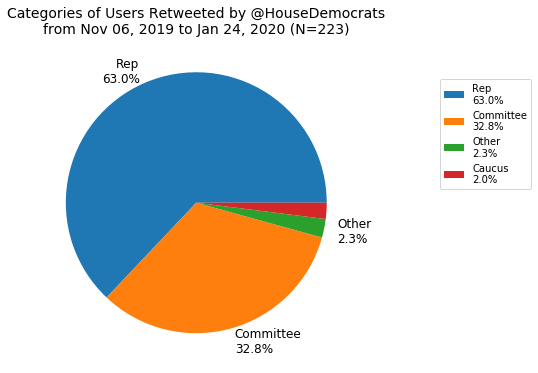

In [40]:
#Unzip tuple list
D_House_l, D_House_fv = zip(*D_House_state_freq)

#Get the sample size
D_House_n = sum(D_House_fv)

#Unzip tuple list
D_House_cats_labels, D_House_cats_vals = zip(*D_House_cats_per)

#Format labels for the pie chart
D_House_cats_display, D_House_cats_all = pie_labels(D_House_cats_labels, D_House_cats_vals)

plt.figure(figsize=[6,6])
plt.pie(D_House_cats_vals, labels=D_House_cats_display, textprops={'fontsize': 12})
D_House_pie_title = "Categories of Users Retweeted by @HouseDemocrats\nfrom "+ D_House_period[0].strftime("%b %d, %Y") + " to " + D_House_period[1].strftime("%b %d, %Y") + " (N=" + str(D_House_n) + ")"
plt.title(D_House_pie_title, fontsize=14)
if "" in D_House_cats_display:
    plt.legend(D_House_cats_all, bbox_to_anchor=(1.3,0.8), loc="upper right", bbox_transform=plt.gcf().transFigure)
plt.savefig("Plots/D_House_Cat_RT.png", bbox_inches="tight")
plt.show()

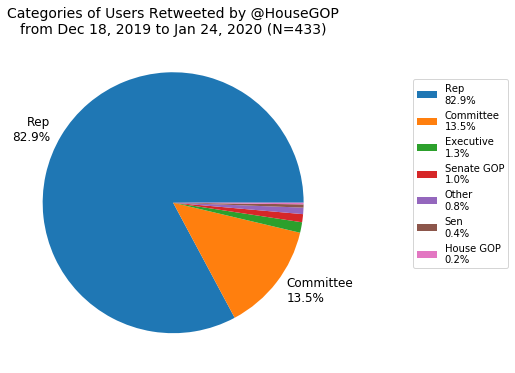

In [41]:
R_House_l, R_House_fv = zip(*R_House_state_freq)
R_House_n = sum(R_House_fv)

R_House_cats_labels, R_House_cats_vals = zip(*R_House_cats_per)
    
R_House_cats_display, R_House_cats_all = pie_labels(R_House_cats_labels, R_House_cats_vals)
    
plt.figure(figsize=[6,6])
plt.pie(R_House_cats_vals, labels=R_House_cats_display, textprops={'fontsize': 12})
R_House_pie_title = "Categories of Users Retweeted by @HouseGOP\nfrom "+ R_House_period[0].strftime("%b %d, %Y") + " to " + R_House_period[1].strftime("%b %d, %Y") + " (N=" + str(R_House_n) + ")"
plt.title(R_House_pie_title, fontsize=14)
if "" in R_House_cats_display:
    plt.legend(R_House_cats_all, bbox_to_anchor=(1.3,0.8), loc="upper right", bbox_transform=plt.gcf().transFigure)
plt.savefig("Plots/R_House_Cat_RT.png", bbox_inches="tight")
plt.show()

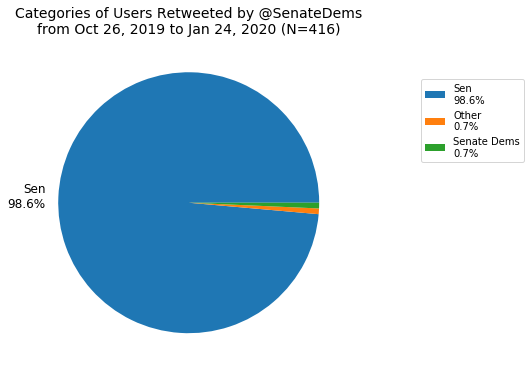

In [42]:
D_Senate_l, D_Senate_fv = zip(*D_Senate_state_freq)
D_Senate_n = sum(D_Senate_fv)

D_Senate_cats_labels, D_Senate_cats_vals = zip(*D_Senate_cats_per)
    
D_Senate_cats_display, D_Senate_cats_all = pie_labels(D_Senate_cats_labels, D_Senate_cats_vals)
    
plt.figure(figsize=[6,6])
plt.pie(D_Senate_cats_vals, labels=D_Senate_cats_display, textprops={'fontsize': 12})
D_Senate_pie_title = "Categories of Users Retweeted by @SenateDems\nfrom "+ D_Senate_period[0].strftime("%b %d, %Y") + " to " + D_Senate_period[1].strftime("%b %d, %Y") + " (N=" + str(D_Senate_n) + ")"
plt.title(D_Senate_pie_title, fontsize=14)
#BUG: The legend does not get included in the saved image, this is probably a pyplot bug
plt.savefig("Plots/D_Senate_Cat_RT.png", bbox_inches="tight")
if "" in D_Senate_cats_display:
    plt.legend(D_Senate_cats_all, bbox_to_anchor=(1.3,0.8), loc="upper right", bbox_transform=plt.gcf().transFigure)
plt.show()

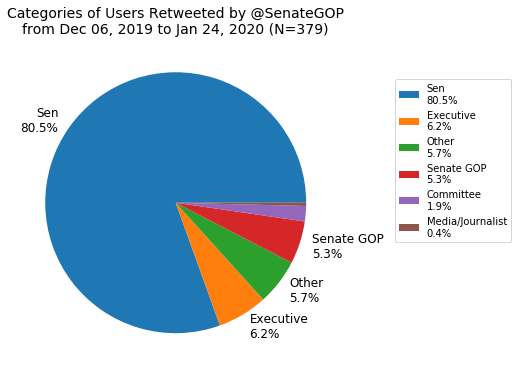

In [43]:
R_Senate_l, R_Senate_fv = zip(*R_Senate_state_freq)
R_Senate_n = sum(R_Senate_fv)

R_Senate_cats_labels, R_Senate_cats_vals = zip(*R_Senate_cats_per)
    
R_Senate_cats_display, R_Senate_cats_all = pie_labels(R_Senate_cats_labels, R_Senate_cats_vals)
    
plt.figure(figsize=[6,6])
plt.pie(R_Senate_cats_vals, labels=R_Senate_cats_display, textprops={'fontsize': 12})
R_Senate_pie_title = "Categories of Users Retweeted by @SenateGOP\nfrom "+ R_Senate_period[0].strftime("%b %d, %Y") + " to " + R_Senate_period[1].strftime("%b %d, %Y") + " (N=" + str(R_Senate_n) + ")"
plt.title(R_Senate_pie_title, fontsize=14)
if "" in R_Senate_cats_display:
    plt.legend(R_Senate_cats_all, bbox_to_anchor=(1.3,0.8), loc="upper right", bbox_transform=plt.gcf().transFigure)
plt.savefig("Plots/R_Senate_Cat_RT.png", bbox_inches="tight")
plt.show()

## Frequency of Birth Year

In [17]:
#List birth year of user for each retweet
D_House_births = []
for user in D_House_MC_list: D_House_births.append(int(user[6]))
D_House_birth_avg = round(sum(D_House_births)/len(D_House_births))
    
R_House_births = []
for user in R_House_MC_list: R_House_births.append(int(user[6]))
R_House_birth_avg = round(sum(R_House_births)/len(R_House_births))
    
D_Senate_births = []
for user in D_Senate_MC_list: D_Senate_births.append(int(user[6]))
D_Senate_birth_avg = round(sum(D_Senate_births)/len(D_Senate_births))
    
R_Senate_births = []
for user in R_Senate_MC_list: R_Senate_births.append(int(user[6]))
R_Senate_birth_avg = round(sum(R_Senate_births)/len(R_Senate_births))

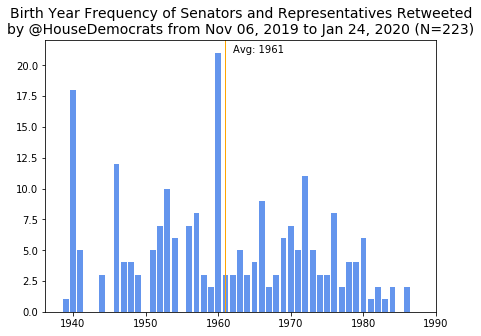

In [18]:
#Unzip list of tuples
D_House_years, D_House_freqs = zip(*freq(D_House_births))

#Plot it
plt.figure(figsize=[7,5])
plt.bar(D_House_years, D_House_freqs, color='cornflowerblue')
D_House_age_title = "Birth Year Frequency of Senators and Representatives Retweeted\nby @HouseDemocrats from "+ D_House_period[0].strftime("%b %d, %Y") + " to " + D_House_period[1].strftime("%b %d, %Y") + " (N=" + str(D_House_n) + ")"
plt.title(D_House_age_title, fontsize=14)
plt.xticks([1940,1950,1960,1970,1980,1990])
plt.axvline(D_House_birth_avg, color='orange', linewidth=1)
plt.text(D_House_birth_avg+1,plt.gca().get_ylim()[1]-1, "Avg: "+str(D_House_birth_avg))
plt.savefig("Plots/D_House_Birth_RT.png", bbox_inches="tight")
plt.show()

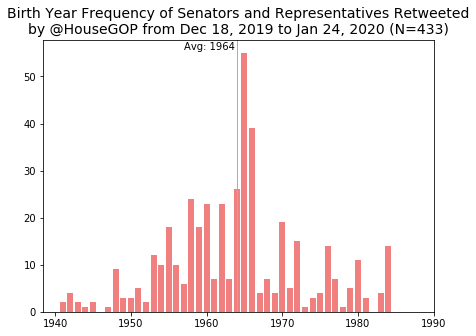

In [19]:
R_House_years, R_House_freqs = zip(*freq(R_House_births))

plt.figure(figsize=[7,5])
plt.bar(R_House_years, R_House_freqs, color='lightcoral')
R_House_age_title = "Birth Year Frequency of Senators and Representatives Retweeted\nby @HouseGOP from "+ R_House_period[0].strftime("%b %d, %Y") + " to " + R_House_period[1].strftime("%b %d, %Y") + " (N=" + str(R_House_n) + ")"
plt.title(R_House_age_title, fontsize=14)
plt.xticks([1940,1950,1960,1970,1980,1990])
plt.axvline(R_House_birth_avg, color='orange', linewidth=1)
plt.text(R_House_birth_avg-7,plt.gca().get_ylim()[1]-2, "Avg: "+str(R_House_birth_avg))
plt.savefig("Plots/R_House_Birth_RT.png", bbox_inches="tight")
plt.show()

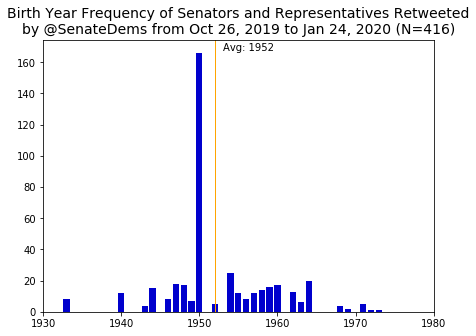

In [20]:
D_Senate_years, D_Senate_freqs = zip(*freq(D_Senate_births))

plt.figure(figsize=[7,5])
plt.bar(D_Senate_years, D_Senate_freqs, color='mediumblue')
D_Senate_age_title = "Birth Year Frequency of Senators and Representatives Retweeted\nby @SenateDems from "+ D_Senate_period[0].strftime("%b %d, %Y") + " to " + D_Senate_period[1].strftime("%b %d, %Y") + " (N=" + str(D_Senate_n) + ")"
plt.title(D_Senate_age_title, fontsize=14)
plt.xticks([1930,1940,1950,1960,1970,1980])
plt.axvline(D_Senate_birth_avg, color='orange', linewidth=1)
plt.text(D_Senate_birth_avg+1,plt.gca().get_ylim()[1]-7, "Avg: "+str(D_Senate_birth_avg))
plt.savefig("Plots/D_Senate_Birth_RT.png", bbox_inches="tight")
plt.show()

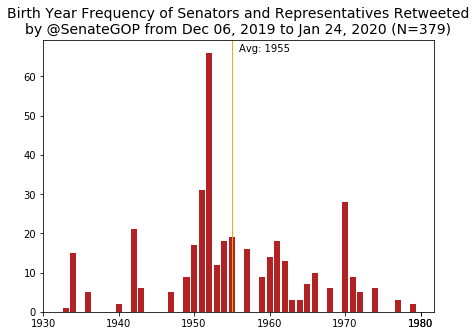

In [21]:
R_Senate_years, R_Senate_freqs = zip(*freq(R_Senate_births))

plt.figure(figsize=[7,5])
plt.bar(R_Senate_years, R_Senate_freqs, color='firebrick')
R_Senate_age_title = "Birth Year Frequency of Senators and Representatives Retweeted\nby @SenateGOP from "+ R_Senate_period[0].strftime("%b %d, %Y") + " to " + R_Senate_period[1].strftime("%b %d, %Y") + " (N=" + str(R_Senate_n) + ")"
plt.title(R_Senate_age_title, fontsize=14)
plt.xticks([1930,1940,1950,1960,1970,1980,1980])
plt.axvline(R_Senate_birth_avg, color='orange', linewidth=1)
plt.text(R_Senate_birth_avg+1,plt.gca().get_ylim()[1]-3, "Avg: "+str(R_Senate_birth_avg))
plt.savefig("Plots/R_Senate_Birth_RT.png", bbox_inches="tight")
plt.show()

## DW-NOMINATE Scores

Average DW-NOM Scores


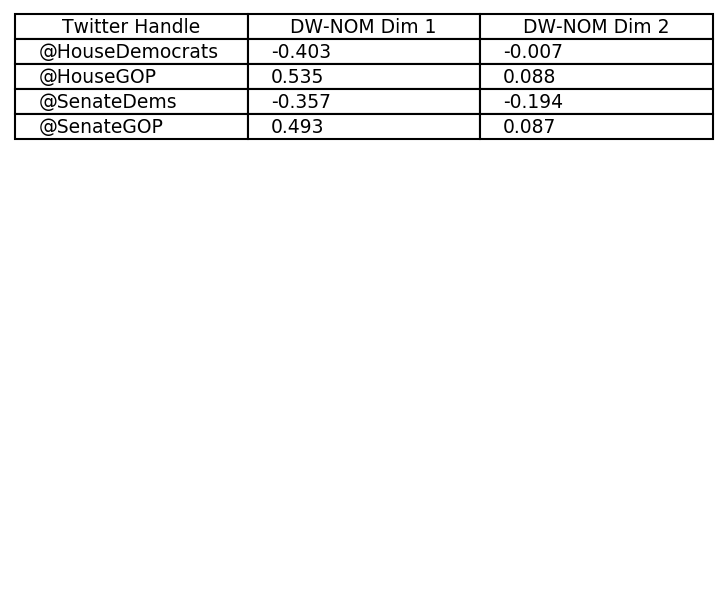

In [22]:
#List of dim 1 DW-NOM scores
D_House_DWNOM1 = []
for mc in D_House_MC_list: D_House_DWNOM1.append(float(mc[7]))

#Get the average
D_House_DWNOM1_avg = round(sum(D_House_DWNOM1)/len(D_House_DWNOM1),3)

#List of dim 2 DW-NOM scores
D_House_DWNOM2 = []
for mc in D_House_MC_list: D_House_DWNOM2.append(float(mc[8]))

#Get the average
D_House_DWNOM2_avg = round(sum(D_House_DWNOM2)/len(D_House_DWNOM2),3)


R_House_DWNOM1 = []
for mc in R_House_MC_list: R_House_DWNOM1.append(float(mc[7]))
R_House_DWNOM1_avg = round(sum(R_House_DWNOM1)/len(R_House_DWNOM1),3)

R_House_DWNOM2 = []
for mc in R_House_MC_list: R_House_DWNOM2.append(float(mc[8]))
R_House_DWNOM2_avg = round(sum(R_House_DWNOM2)/len(R_House_DWNOM2),3)


D_Senate_DWNOM1 = []
for mc in D_Senate_MC_list: D_Senate_DWNOM1.append(float(mc[7]))
D_Senate_DWNOM1_avg = round(sum(D_Senate_DWNOM1)/len(D_Senate_DWNOM1),3)

D_Senate_DWNOM2 = []
for mc in D_Senate_MC_list: D_Senate_DWNOM2.append(float(mc[8]))
D_Senate_DWNOM2_avg = round(sum(D_Senate_DWNOM2)/len(D_Senate_DWNOM2),3)


R_Senate_DWNOM1 = []
for mc in R_Senate_MC_list: R_Senate_DWNOM1.append(float(mc[7]))
R_Senate_DWNOM1_avg = round(sum(R_Senate_DWNOM1)/len(R_Senate_DWNOM1),3)

R_Senate_DWNOM2 = []
for mc in R_Senate_MC_list: R_Senate_DWNOM2.append(float(mc[8]))
R_Senate_DWNOM2_avg = round(sum(R_Senate_DWNOM2)/len(R_Senate_DWNOM2),3)


#Make the table
col1 = ["@HouseDemocrats", "@HouseGOP", "@SenateDems", "@SenateGOP"]
col2 = [D_House_DWNOM1_avg, R_House_DWNOM1_avg, D_Senate_DWNOM1_avg, R_Senate_DWNOM1_avg]
col3 = [D_House_DWNOM2_avg, R_House_DWNOM2_avg, D_Senate_DWNOM2_avg, R_Senate_DWNOM2_avg]
DWNOM_table = list(zip(col1, col2, col3))

fig = plt.figure(dpi=150)
ax = fig.add_subplot(1,1,1)

table = ax.table(DWNOM_table, cellLoc='left', colLabels=['Twitter Handle','DW-NOM Dim 1','DW-NOM Dim 2'], loc='top')
ax.axis('off')
plt.savefig("Tables/DWNOM.png", bbox_inches="tight")
print("Average DW-NOM Scores")
plt.show()

In [23]:
#Utility function to pull or construct a readable name from a list of user info lists
def readable_names(bio_list):
    
    output_list = []
    
    for bio in bio_list:
        if bio[0]=='Sen' or bio[0]=="Rep": output_list.append(bio[0] + ". " + bio[1])
        elif bio[0]=='Committee': output_list.append(bio[2])
        elif bio[0]=='Caucus' or bio[0]=='Executive' or bio[0]=='Media/Journalist' or bio[0]=='Other': 
            output_list.append(bio[1])
        else: output_list.append(bio[0])
    
    return output_list

House Dems Retweets


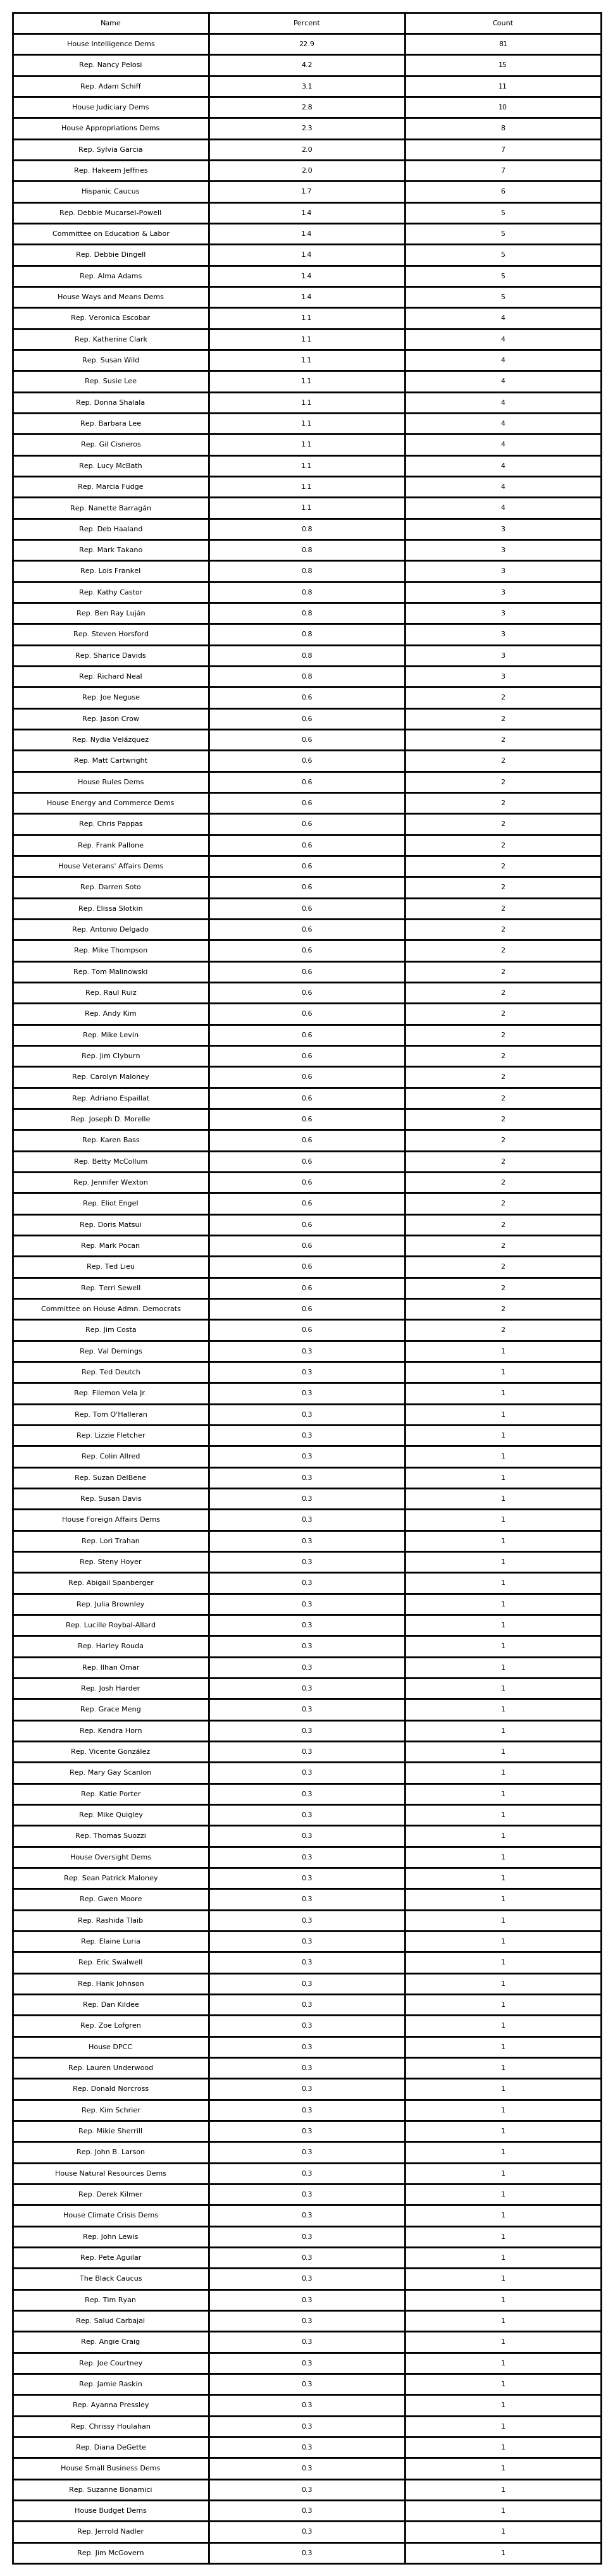

In [24]:
#Get the counts of each user
D_House_names_freq = freq(D_House_bios)

#Sort
D_House_names_freq.sort(key=operator.itemgetter(1), reverse=True)

#Unzip
D_House_handles,D_House_freqvals = zip(*D_House_names_freq)
D_House_readablenames = readable_names(D_House_handles)

D_House_names_per = freq_to_per(D_House_names_freq)
D_House_handles2,D_House_pervals = zip(*D_House_names_per)

D_House_table = list(zip(D_House_readablenames,D_House_pervals,D_House_freqvals))

fig = plt.figure(dpi=200)
ax = fig.add_subplot(1,1,1)

table = ax.table(D_House_table, cellLoc='center', colLabels=['Name','Percent','Count'], loc='center')
ax.axis('off')
plt.savefig("Tables/D_House_Freq_RT.png", bbox_inches="tight")
print("House Dems Retweets")
plt.show()

House GOP Retweets


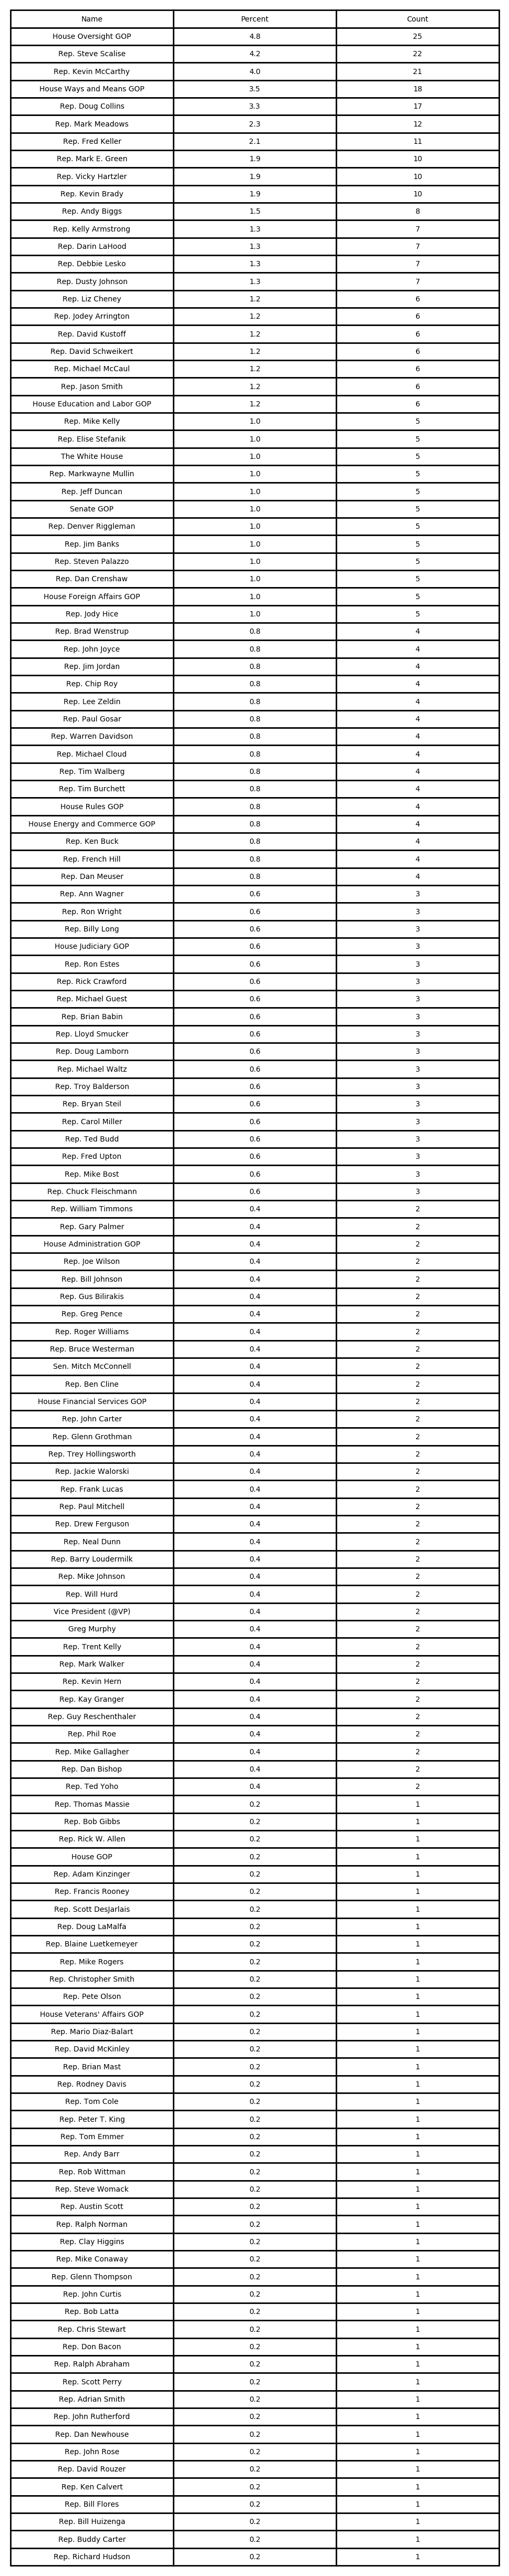

In [25]:
R_House_names_freq = freq(R_House_bios)
R_House_names_freq.sort(key=operator.itemgetter(1), reverse=True)
R_House_handles,R_House_freqvals = zip(*R_House_names_freq)
R_House_readablenames = readable_names(R_House_handles)

R_House_names_per = freq_to_per(R_House_names_freq)
R_House_handles2,R_House_pervals = zip(*R_House_names_per)

R_House_table = list(zip(R_House_readablenames,R_House_pervals,R_House_freqvals))

fig = plt.figure(dpi=200)
ax = fig.add_subplot(1,1,1)

table = ax.table(R_House_table, cellLoc='center', colLabels=['Name','Percent','Count'], loc='center')
ax.axis('off')
plt.savefig("Tables/R_House_Freq_RT.png", bbox_inches="tight")
print("House GOP Retweets")
plt.show()

Senate Dems Retweets


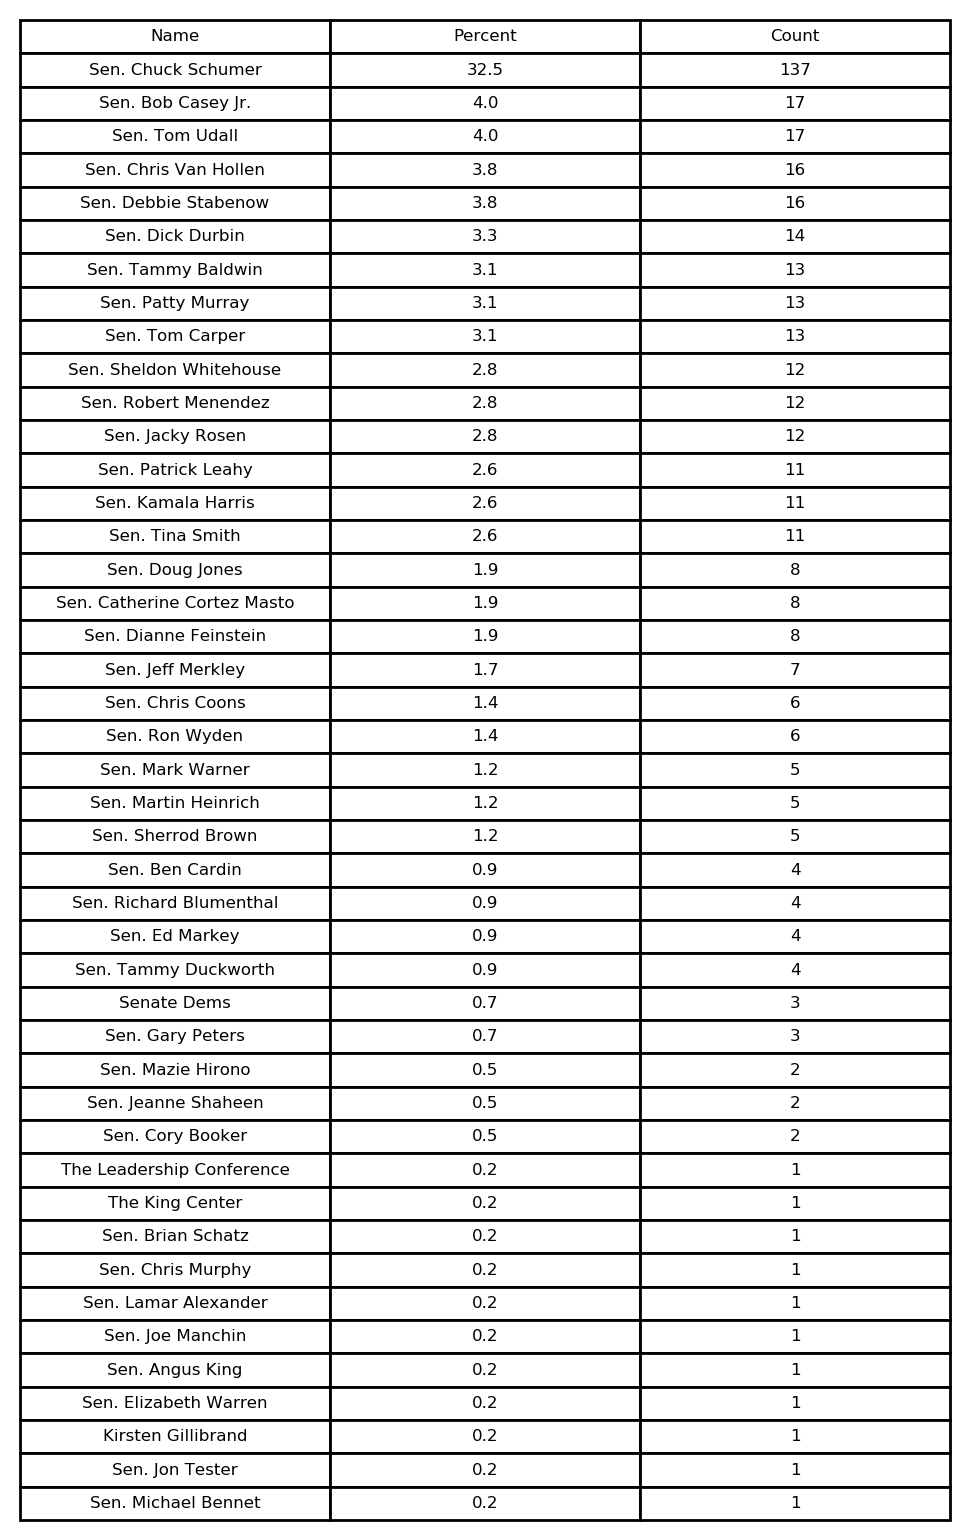

In [26]:
D_Senate_names_freq = freq(D_Senate_bios)
D_Senate_names_freq.sort(key=operator.itemgetter(1), reverse=True)
D_Senate_handles,D_Senate_freqvals = zip(*D_Senate_names_freq)
D_Senate_readablenames = readable_names(D_Senate_handles)

D_Senate_names_per = freq_to_per(D_Senate_names_freq)
D_Senate_handles2,D_Senate_pervals = zip(*D_Senate_names_per)

D_Senate_table = list(zip(D_Senate_readablenames,D_Senate_pervals,D_Senate_freqvals))

fig = plt.figure(dpi=200)
ax = fig.add_subplot(1,1,1)

table = ax.table(D_Senate_table, cellLoc='center', colLabels=['Name','Percent','Count'], loc='center')
ax.axis('off')
plt.savefig("Tables/D_Senate_Freq_RT.png", bbox_inches="tight")
print("Senate Dems Retweets")
plt.show()

Senate GOP Retweets


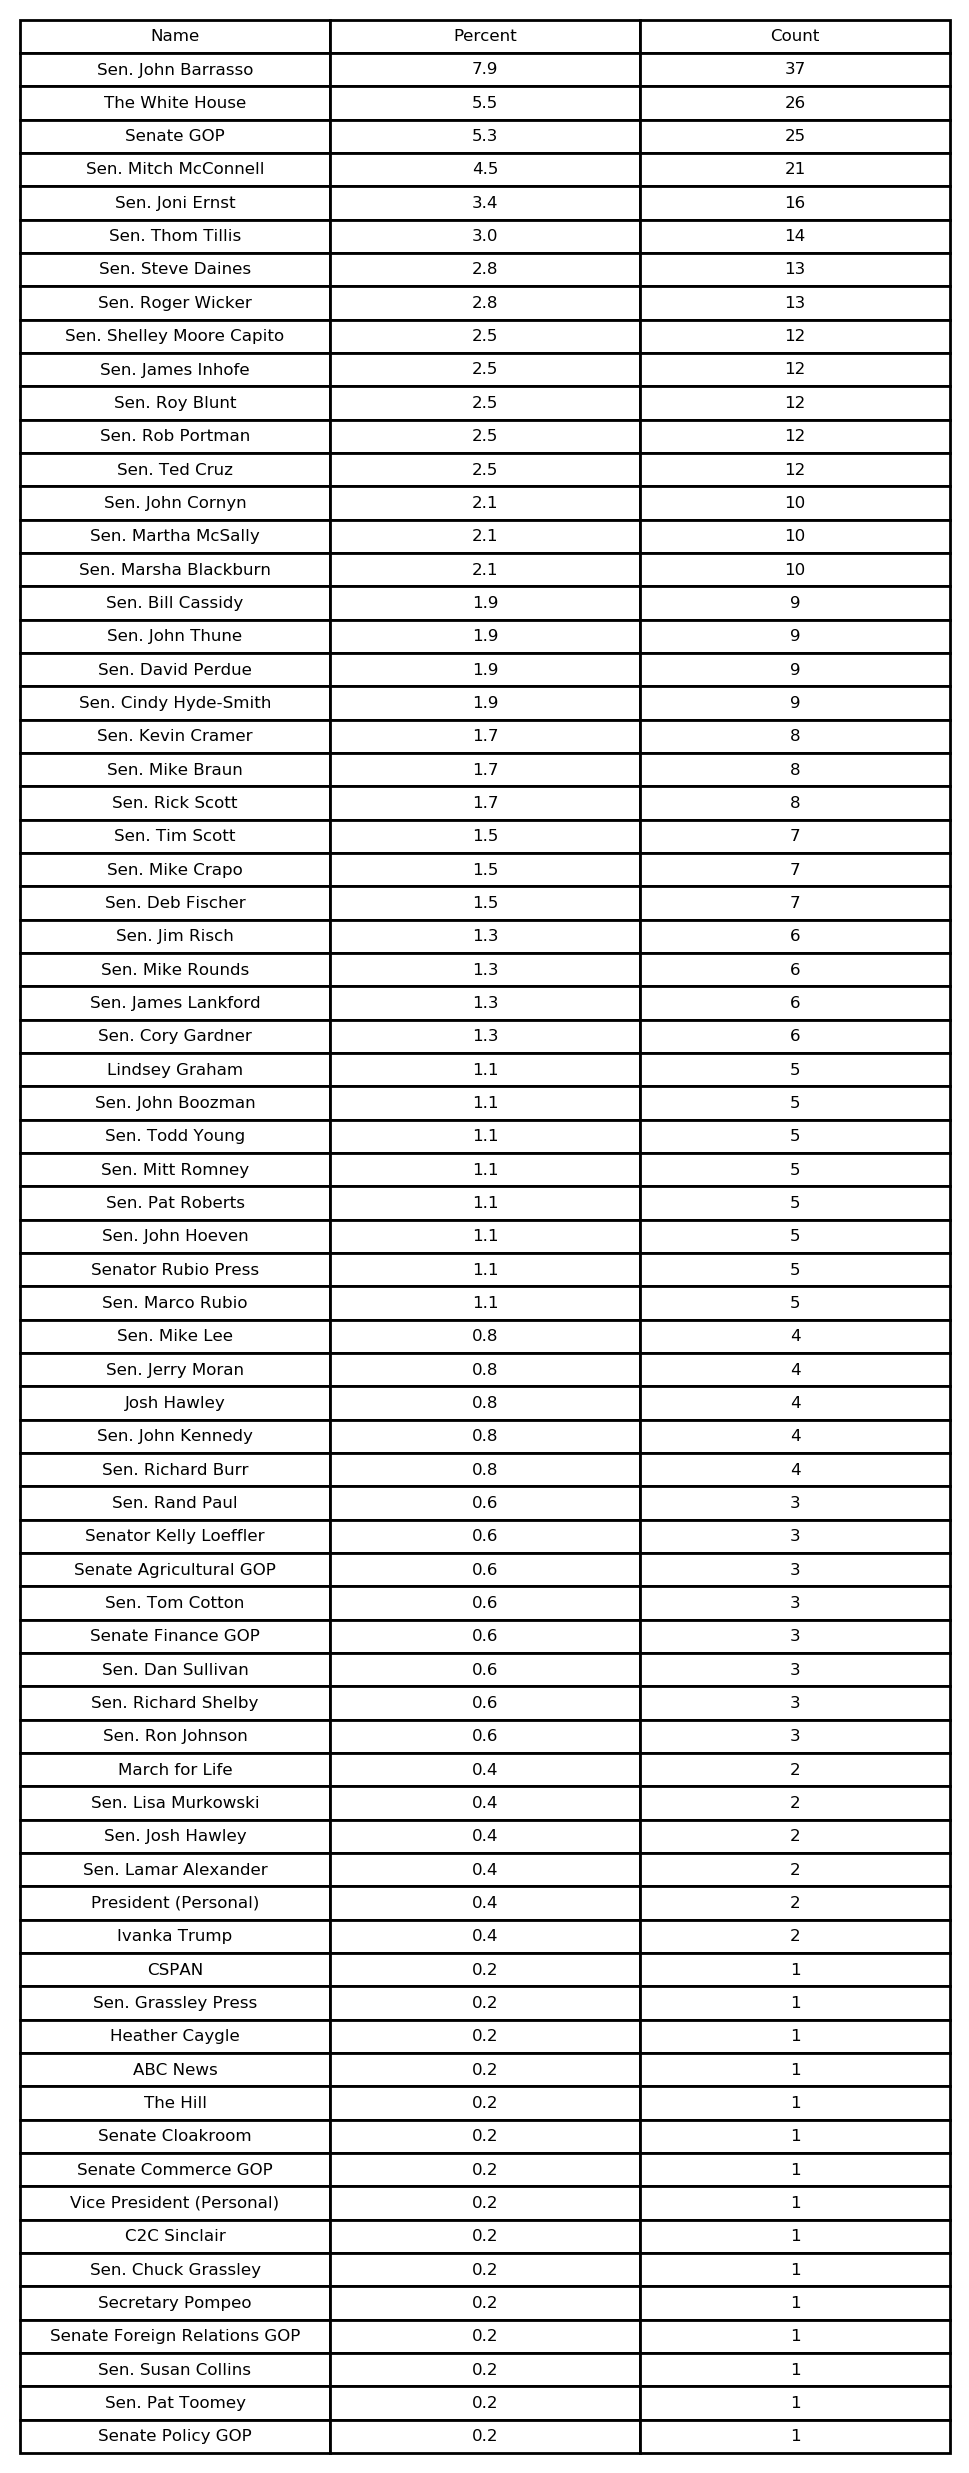

In [27]:
R_Senate_names_freq = freq(R_Senate_bios)
R_Senate_names_freq.sort(key=operator.itemgetter(1), reverse=True)
R_Senate_handles,R_Senate_freqvals = zip(*R_Senate_names_freq)
R_Senate_readablenames = readable_names(R_Senate_handles)

R_Senate_names_per = freq_to_per(R_Senate_names_freq)
R_Senate_handles2,R_Senate_pervals = zip(*R_Senate_names_per)

R_Senate_table = list(zip(R_Senate_readablenames,R_Senate_pervals,R_Senate_freqvals))

fig = plt.figure(dpi=200)
ax = fig.add_subplot(1,1,1)

table = ax.table(R_Senate_table, cellLoc='center', colLabels=['Name','Percent','Count'], loc='center')
ax.axis('off')
plt.savefig("Tables/R_Senate_Freq_RT.png", bbox_inches="tight")
print("Senate GOP Retweets")
plt.show()